**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [ ]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [ ]:
from scipy.optimize import fsolve

# Define price grid and wage
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
w = 1

# Define the labor demand  and output for the firm
def firm_labor_demand(w, p_j):
    return (p_j * par.A * par.gamma / w) ** (1 / (1 - par.gamma))

def firm_output(w, p_j):
    return par.A * (firm_labor_demand(w, p_j)) ** par.gamma

# Define the implied profits function
def firm_profits(w, p_j):
    return (1 - par.gamma) / par.gamma * w * firm_labor_demand(w, p_j)

# Define consumer behavior functions
def consumer_c1(w, p1, pi1, pi2, l):
    return par.alpha * (w * l + par.T + pi1 + pi2) / p1

def consumer_c2(w, p2, pi1, pi2, l):
    return (1 - par.alpha) * (w * l + par.T + pi1 + pi2) / (p2+par.tau)

# Define utility function
def utility(w, p1, p2, l):
    pi1 = firm_profits(w, p1)
    pi2 = firm_profits(w, p2)
    c1 = consumer_c1(w, p1, pi1, pi2, l)
    c2 = consumer_c2(w, p2, pi1, pi2, l)
    return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * l ** (1 + par.epsilon) / (1 + par.epsilon)

# Optimal labor supply
def optimal_labor(w, p1, p2):
    
    def objective(l):
        return -utility(w, p1, p2, l)
    
    result = fsolve(objective, 1.0)
    return result[0]

# Market clearing conditions
def market_clearing_conditions(w, p1, p2):
    # Optimal labor for both firms
    l1_star = firm_labor_demand(w, p1)
    l2_star = firm_labor_demand(w, p2)

    # Optimal output for both firms
    y1_star = firm_output(w, l1_star)
    y2_star = firm_output(w, l2_star)

    # Implied profits for both firms
    pi1_star = firm_profits(w, p1)
    pi2_star = firm_profits(w, p2)

    # Find the optimal labor supply for the consumer
    l_star = optimal_labor(w, p1, p2)

    # Optimal consumption for the consumer
    c1_star = consumer_c1(w, p1, pi1_star, pi2_star, l_star)
    c2_star = consumer_c2(w, p2, pi1_star, pi2_star, l_star)

    # Check market clearing conditions
    labor_market_clearing = np.isclose(l_star, l1_star + l2_star)
    good1_market_clearing = np.isclose(c1_star, y1_star)
    good2_market_clearing = np.isclose(c2_star, y2_star)
    
    return labor_market_clearing, good1_market_clearing, good2_market_clearing

# Check market clearing conditions
results = []
for p1 in p1_values:
    for p2 in p2_values:
        labor_clearing, good1_clearing, good2_clearing = market_clearing_conditions(w, p1, p2)
        if labor_clearing and good1_clearing and good2_clearing:
            results.append((p1, p2, labor_clearing, good1_clearing, good2_clearing))

# Print the results where both good1 and good2 markets clear
if results:
    for result in results:
        print(result)
else:
    print("No results where both goods markets clear.")

C:\Users\pwarr\AppData\Local\Temp\ipykernel_35684\4271542677.py:40: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  result = fsolve(objective, 1.0)
C:\Users\pwarr\AppData\Local\Temp\ipykernel_35684\4271542677.py:40: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  result = fsolve(objective, 1.0)
C:\Users\pwarr\AppData\Local\Temp\ipykernel_35684\4271542677.py:32: RuntimeWarning: invalid value encountered in power
  return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * l ** (1 + par.epsilon) / (1 + par.epsilon)


No results where both goods markets clear.


We see that code does not find any prices in the given grid set that satisfies the market clearing conditions. This can either be because the prices are outside the grid set or inbetween the elements in the grid set.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [51]:
# Market clearing conditions
def market_clearing(prices):
    p1, p2 = prices

    # Labor supply
    l_star = optimal_labor(w, p1, p2)

    # Firm profits
    pi1 = firm_profits(w, p1)
    pi2 = firm_profits(w, p2)
    
    # Goods market clearing
    y1 = firm_output(w, p1)
    y2 = firm_output(w, p2)
    
    # Optimal consumption 
    c1 = consumer_c1(w, p1, pi1, pi2, l_star)
    c2 = consumer_c2(w, p2, pi1, pi2, l_star)
    
    # check market clearing conditions
    goods_market_1 = c1 - y1
    goods_market_2 = c2 - y2
    
    return [goods_market_1, goods_market_2]

# Solve for equilibrium prices
initial_guess = [0.5, 1.5]
equilibrium_prices = fsolve(market_clearing, initial_guess)

p1_star, p2_star = equilibrium_prices

print(f'Equilibrium price for good 1: {p1_star}')
print(f'Equilibrium price for good 2: {p2_star}')

AttributeError: 'types.SimpleNamespace' object has no attribute 'gamma'

To find the equilibrium prices we use Walras' law. (i.e. we use a solver that clears the markets for the 2 goods)

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [ ]:
from scipy.optimize import minimize

# Social welfare function
def social_welfare(tau):
    # Parameter tau
    par.tau = tau

    #optimal labor supply and demand
    l_star = optimal_labor(w, p1_star, p2_star + tau)
    l2_star = firm_labor_demand(w, p2_star)

    # Optimal production 
    y2_star = firm_output(w, l2_star)

    # Implied profits for both firms
    pi1_star = firm_profits(w, p1_star)
    pi2_star = firm_profits(w, p2_star)

    # Total income
    total_income = w * l_star + pi1_star + pi2_star + par.T

    # Optimal consumption for the consumer
    c1_star = par.alpha * total_income / p1
    c2_star = (1 - par.alpha) * total_income / (p2 + par.tau)

    par.T = tau * c2_star

    # Utility
    utility_value = np.log(c1_star**par.alpha * c2_star**(1 - par.alpha)) - par.nu * (l_star**(1 + par.epsilon)) / (1 + par.epsilon)

    # Social welfare function
    swf = utility_value - par.kappa * y2_star

    return -swf  # We find the negative SWF so we can use this to minimize

# Initial guess for tau 
initial_guess = [0.5]

# Find the optimal tau
opt_result = minimize(social_welfare, initial_guess, bounds=[(0, 10)])

# Extract the optimal tau
optimal_tau = opt_result.x[0]

# Calculate the implied T
l2_star = firm_labor_demand(w, p2_star)
y2_star = firm_output(w, l2_star) 
optimal_T = optimal_tau * y2_star

print(f'Optimal tau: {optimal_tau}, Optimal T: {optimal_T}')

Optimal tau: 0.5000047314683903, Optimal T: 0.13886599563481022


C:\Users\pwarr\AppData\Local\Temp\ipykernel_35684\4271542677.py:40: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  result = fsolve(objective, 1.0)
C:\Users\pwarr\AppData\Local\Temp\ipykernel_35684\4271542677.py:40: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  result = fsolve(objective, 1.0)


We define the social welfare function and optimize this for a value of tau, then we calculate optimal T for the optimal tau. 

Note (in exercise 1): We see that we get some runtime warnings which might indicate that the code is not optimal. 

In [ ]:
from scipy.optimize import minimize, fsolve
import numpy as np

def household_utility(p1, p2, w, T, tau):
    l_star = optimal_labor(w, p1, p2)
    total_income = w * l_star + T + firm_profits(w, p1) + firm_profits(w, p2)
    c1_star = par.alpha * total_income / p1
    c2_star = (1 - par.alpha) * total_income / (p2 + tau)
    return l_star, c1_star, c2_star

# Given equilibrium prices
def market_clearing_conditions(prices, w, par):
    p1, p2 = prices
    
    # Household optimal behavior
    l_star, c1_star, c2_star = household_utility(p1, p2, w, par.T, par.tau)
    
    # Firm production
    l1_star = optimal_labor(w, p1, p2)
    y1_star = firm_output(w, l1_star)
    l2_star = optimal_labor(w, p1, p2)
    y2_star = firm_output(w, l2_star)
    
    # Market clearing conditions
    labor_market_clearing = l_star - (l1_star + l2_star)
    good1_market_clearing = c1_star - y1_star
    
    # Using Walras' law, we only need to check two conditions
    return [labor_market_clearing, good1_market_clearing]

# Initial guess for prices
initial_guess = [1.0, 1.0]

# Finding equilibrium prices
equilibrium_prices = fsolve(market_clearing_conditions( ), initial_guess)
p1_star, p2_star = equilibrium_prices

# Define the social welfare function to maximize
def social_welfare(tau):
    par.tau = tau
    l_star, c1_star, c2_star = household_utility(p1_star, p2_star, w, par.T, par.tau)
    l2_star = optimal_labor(w, p1_star, p2_star)
    y2_star = firm_output(w, l2_star)
    pi1_star = firm_profits(w, p1_star)
    pi2_star = firm_profits(w, p2_star)
    total_income = w * l_star + pi1_star + pi2_star + par.T
    c1_star = par.alpha * total_income / p1_star
    c2_star = (1 - par.alpha) * total_income / (p2_star + par.tau)
    par.T = tau * c2_star
    utility_value = np.log(c1_star**par.alpha * c2_star**(1 - par.alpha)) - par.nu * l_star**(1 + par.epsilon) / (1 + par.epsilon)
    swf = utility_value - par.kappa * y2_star
    return -swf

# Optimize the social welfare function
initial_guess_tau = 0.5
opt_result = minimize(social_welfare, initial_guess_tau, bounds=[(0, 10)])

# Extract the optimal tau
optimal_tau = opt_result.x[0]

# Calculate the implied T
_, _, c2_star = household_utility(p1_star, p2_star, w, par.T, optimal_tau)
optimal_T = optimal_tau * c2_star

optimal_tau, optimal_T
optimal_tau, optimal_T

TypeError: market_clearing_conditions() missing 3 required positional arguments: 'prices', 'w', and 'par'

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [ ]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [ ]:
import pandas as pd
# Function to calculate expected and realized utilities
def calculate_utilities():
    # Initialize arrays to store utilities
    expected_utilities = np.zeros(par.J)
    realized_utilities = np.zeros(par.J)

# Calculate expected and realized utilities for each career track
    for j in range(par.J):
        # Simulate K values of epsilon for career track j
        epsilon_ij = np.random.normal(0, par.sigma, par.K)
        # Calculate expected utility for career track j
        expected_utilities[j] = par.v[j]
        # Calculate realized utility for career track j
        realized_utilities[j] = par.v[j] + np.mean(epsilon_ij)

    return expected_utilities, realized_utilities

# Calculate utilities
expected_utilities, realized_utilities = calculate_utilities()

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Career Track': np.arange(par.J) + 1,
    'Average Expected Utility': expected_utilities,
    'Average Realized Utility': realized_utilities
})

print(result_df)



c:\Users\pwarr\Programmering\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   Career Track  Average Expected Utility  Average Realized Utility
0             1                       1.0                  0.994809
1             2                       2.0                  2.012741
2             3                       3.0                  2.986910


Using the expressions provided in the exam set, we calcualte the **Average Expected Utility** and the **Average Realized Utility**
We notices that the **Average Realized Utility** is close to the **Average expected Utility**, which makes sense as the sum of the error terms converge to the expected value of 0 as we get more draws. 

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

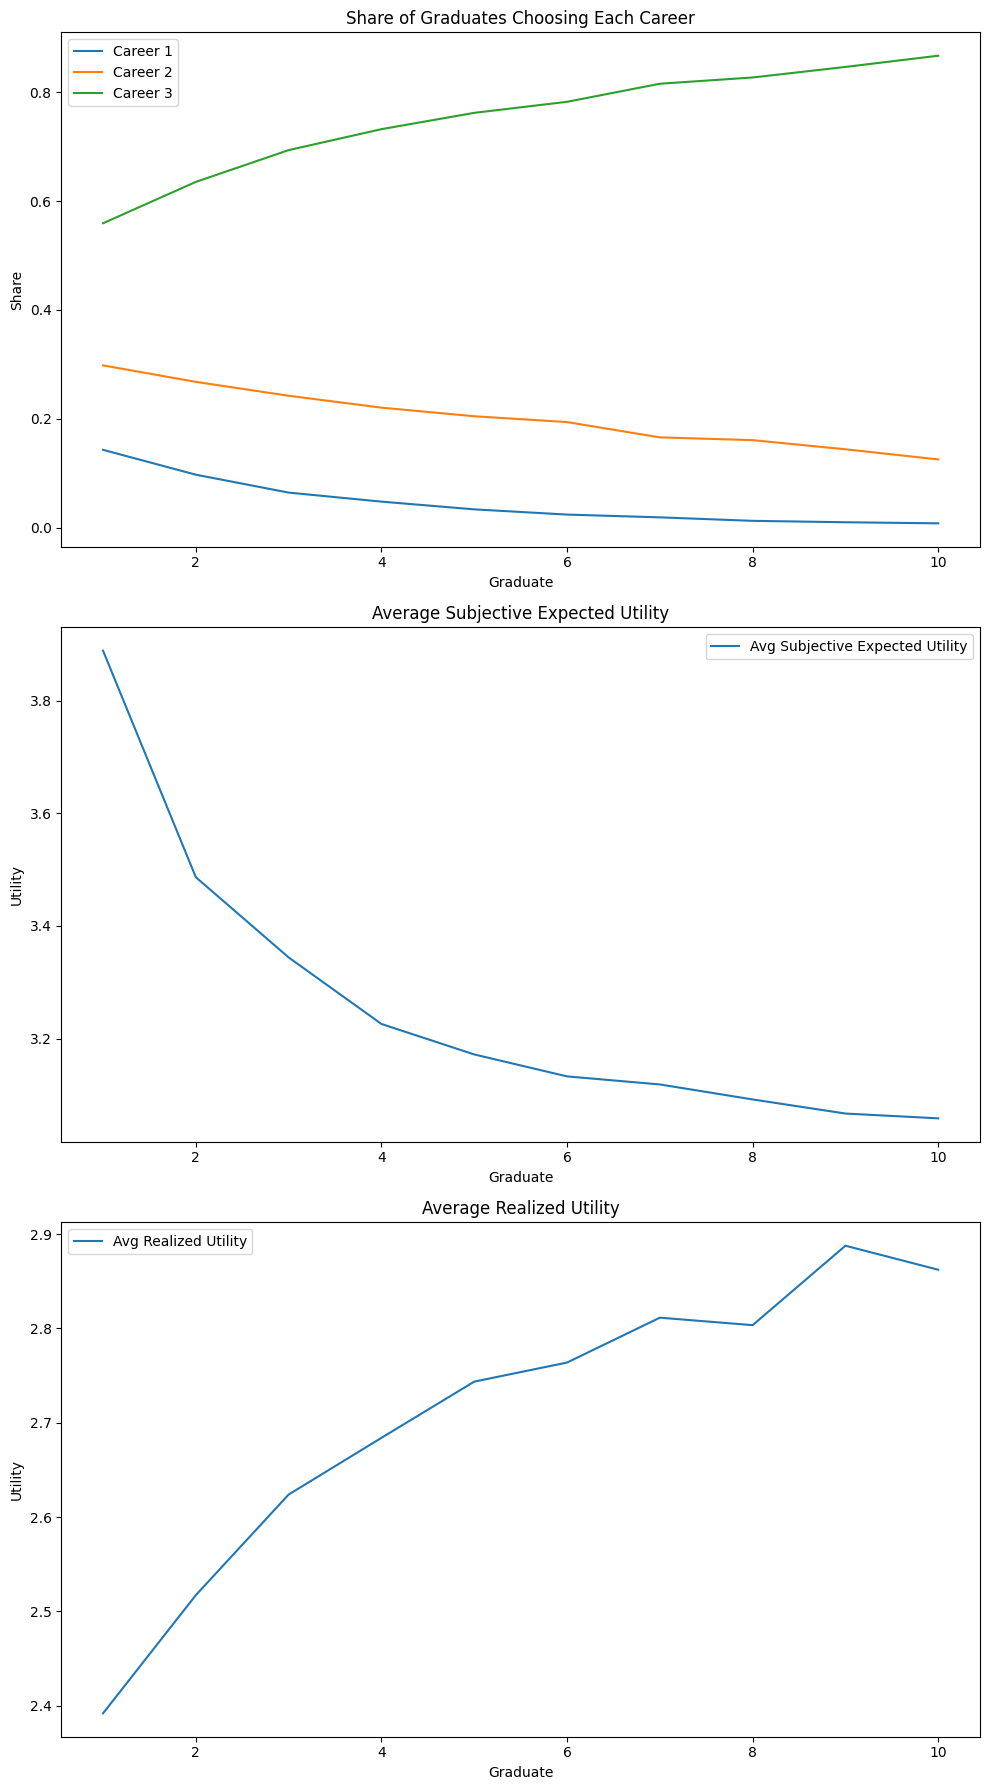

In [ ]:
# Arrays to store the results
share_of_graduates = np.zeros((par.N, par.J))
avg_subjective_expected_utility = np.zeros(par.N)
avg_realized_utility = np.zeros(par.N)

# Simulation
for k in range(par.K):
    for i in range(par.N):
        F_i = i + 1  # number of friends
        prior_expected_utility = np.zeros(par.J)
        
        for j in range(par.J):
            # Draw F_i values of epsilon for friends in career j
            epsilon_friends = np.random.normal(0, par.sigma, F_i)
            prior_expected_utility[j] = par.v[j] + np.mean(epsilon_friends)
        
        # Draw own noise terms
        epsilon_own = np.random.normal(0, par.sigma, par.J)
        
        # Choose the career with the highest expected utility
        j_star = np.argmax(prior_expected_utility)
        
        # Store results
        share_of_graduates[i, j_star] += 1
        avg_subjective_expected_utility[i] += prior_expected_utility[j_star]
        avg_realized_utility[i] += par.v[j_star] + epsilon_own[j_star]

# Normalize results
share_of_graduates /= par.K
avg_subjective_expected_utility /= par.K
avg_realized_utility /= par.K

# Prepare DataFrame for visualization
results_df = pd.DataFrame({
    'Graduate': np.arange(1, par.N + 1),
    'Share_Career_1': share_of_graduates[:, 0],
    'Share_Career_2': share_of_graduates[:, 1],
    'Share_Career_3': share_of_graduates[:, 2],
    'Avg_Subjective_Expected_Utility': avg_subjective_expected_utility,
    'Avg_Realized_Utility': avg_realized_utility
})

import matplotlib.pyplot as plt

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Share of graduates choosing each career
for j in range(par.J):
    axs[0].plot(results_df['Graduate'], results_df[f'Share_Career_{j+1}'], label=f'Career {j+1}')
axs[0].set_title('Share of Graduates Choosing Each Career')
axs[0].set_xlabel('Graduate')
axs[0].set_ylabel('Share')
axs[0].legend()

# Average subjective expected utility
axs[1].plot(results_df['Graduate'], results_df['Avg_Subjective_Expected_Utility'], label='Avg Subjective Expected Utility')
axs[1].set_title('Average Subjective Expected Utility')
axs[1].set_xlabel('Graduate')
axs[1].set_ylabel('Utility')
axs[1].legend()

# Average realized utility
axs[2].plot(results_df['Graduate'], results_df['Avg_Realized_Utility'], label='Avg Realized Utility')
axs[2].set_title('Average Realized Utility')
axs[2].set_xlabel('Graduate')
axs[2].set_ylabel('Utility')
axs[2].legend()

plt.tight_layout()
plt.show()


Using the expressions provided in the exam set, we calcualte the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. We see that the amount of friends $F_i = i$ increases the share that chooses carrer path 3. This makes sense as carrer 3 is the optimal carrer choice given perfect information and an increase in the amount of friends $F_i = i$ gets you closer to perfect information by reducing the noise from the error terms. Both the Average subjective expected utility and average realized utility converges towards 3, due to the same reasons of increased information outlined above. 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

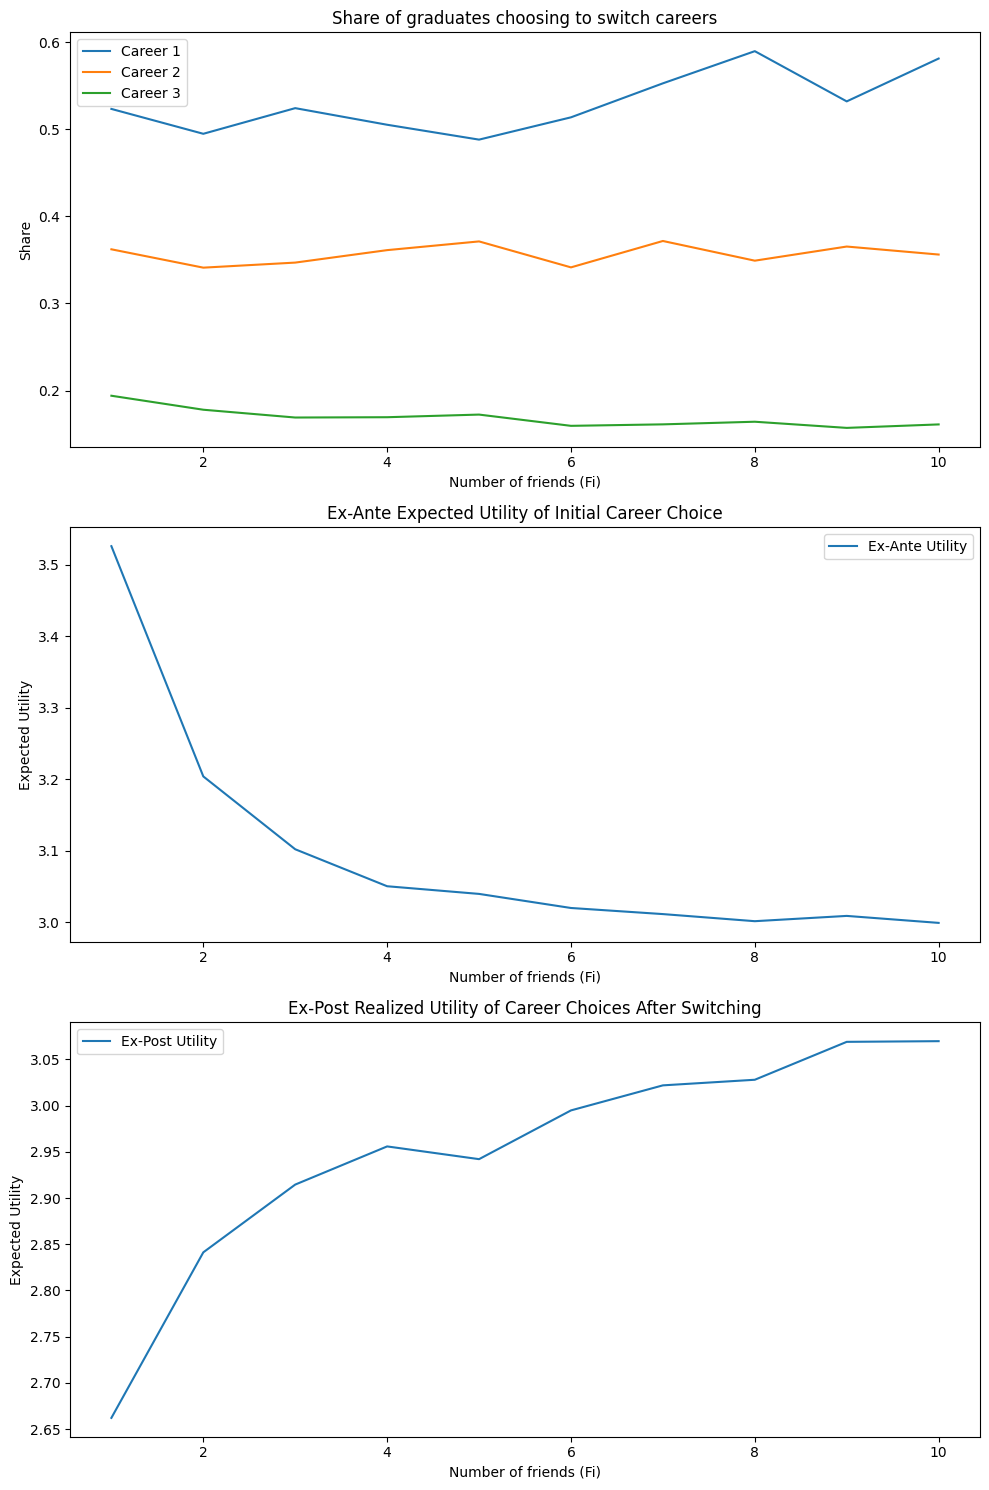

In [ ]:
# Initialize arrays to store results
career_choices_first = np.zeros((par.N, par.K), dtype=int)
career_choices_second = np.zeros((par.N, par.K), dtype=int)
utilities_first = np.zeros((par.N, par.K))
utilities_second = np.zeros((par.N, par.K))
switched = np.zeros((par.N, par.K), dtype=bool)

# Simulation
for k in range(par.K):
    for i in range(1, par.N + 1):
        Fi = i  # Number of friends in each career
        noise_friends = np.random.normal(0, par.sigma, (Fi, par.J))
        noise_own = np.random.normal(0, par.sigma, par.J)

# Prior expected utilities from friends
        u_tilde = par.v + noise_friends.mean(axis=0)

# First career choice
        j_star = np.argmax(u_tilde)
        career_choices_first[i - 1, k] = j_star
        utilities_first[i - 1, k] = u_tilde[j_star]

# Learning the true utility of the first chosen career
        true_utility_first = par.v[j_star] + noise_own[j_star]

# New prior for the second period including switching cost
        u_tilde_new = np.where(np.arange(par.J) == j_star, true_utility_first, u_tilde - par.c)

# Second career choice
        j_star_new = np.argmax(u_tilde_new)
        career_choices_second[i - 1, k] = j_star_new
        utilities_second[i - 1, k] = par.v[j_star_new] + noise_own[j_star_new] - (par.c if j_star_new != j_star else 0)
        switched[i - 1, k] = (j_star_new != j_star)

# Calculate statistics for visualization
share_switched = np.zeros((par.J, par.N))
for j in range(par.J):
    for i in range(par.N):
        switch_indices = (career_choices_first[i] == j)
        if switch_indices.any():
            share_switched[j, i] = np.mean(switched[i][switch_indices])
# Calculate ex-ante expected utility 
ex_ante_utility = np.zeros(par.N)
for i in range(1, par.N + 1):
    Fi = i
    utility_samples = np.zeros(par.K)
    for k in range(par.K):
        noise_friends = np.random.normal(0, par.sigma, (Fi, par.J))
        u_tilde = par.v + noise_friends.mean(axis=0)
        for j_star in range(par.J):
            u_tilde_new = np.where(np.arange(par.J) == j_star, u_tilde[j_star], u_tilde - par.c)
            utility_samples[k] = np.max(u_tilde_new)
    ex_ante_utility[i - 1] = np.mean(utility_samples)

# Calculate ex-post realized utility 
ex_post_utility = np.mean(utilities_second, axis=1)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Share of graduates choosing to switch careers for each career j=1,2,3
for j in range(par.J):
    ax[0].plot(range(1, par.N + 1), share_switched[j], label=f'Career {j + 1}')
ax[0].set_title('Share of graduates choosing to switch careers')
ax[0].set_xlabel('Number of friends (Fi)')
ax[0].set_ylabel('Share')
ax[0].legend()

# Expected utilities before switching (ex-ante)
ax[1].plot(range(1, par.N + 1), ex_ante_utility, label='Ex-Ante Utility')
ax[1].set_title('Ex-Ante Expected Utility of Initial Career Choice')
ax[1].set_xlabel('Number of friends (Fi)')
ax[1].set_ylabel('Expected Utility')
ax[1].legend()

# Expected utilities after switching (ex-post)
ax[2].plot(range(1, par.N + 1), ex_post_utility, label='Ex-Post Utility')
ax[2].set_title('Ex-Post Realized Utility of Career Choices After Switching')
ax[2].set_xlabel('Number of friends (Fi)')
ax[2].set_ylabel('Expected Utility')
ax[2].legend()

plt.tight_layout()
plt.show()

We again see that both the Average subjective expected utility and average realized utility converges towards 3, due to the same reasons of increased information outlined above. we also see that the share of graduates which swich from carrer path 3 is low as this is the optimal and therefore higher for the other carrer paths. 

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [ ]:
def find_point(X, y, condition):
    distances = np.sqrt((X[:, 0] - y[0])**2 + (X[:, 1] - y[1])**2)
    filtered_indices = np.where(condition(X, y))[0]
    if len(filtered_indices) == 0:
        return None
    closest_index = filtered_indices[np.argmin(distances[filtered_indices])]
    return X[closest_index]

# Define conditions for A, B, C, and D
cond_A = lambda X, y: (X[:, 0] > y[0]) & (X[:, 1] > y[1])
cond_B = lambda X, y: (X[:, 0] > y[0]) & (X[:, 1] < y[1])
cond_C = lambda X, y: (X[:, 0] < y[0]) & (X[:, 1] < y[1])
cond_D = lambda X, y: (X[:, 0] < y[0]) & (X[:, 1] > y[1])

# Find points A, B, C, and D
A = find_point(X, y, cond_A)
B = find_point(X, y, cond_B)
C = find_point(X, y, cond_C)
D = find_point(X, y, cond_D)

print("A:", A)
print("B:", B)
print("C:", C)
print("D:", D)

A: [0.26071605 0.43635845]
B: [0.21315735 0.274245  ]
C: [0.10056103 0.27951775]
D: [0.20634391 0.44272557]


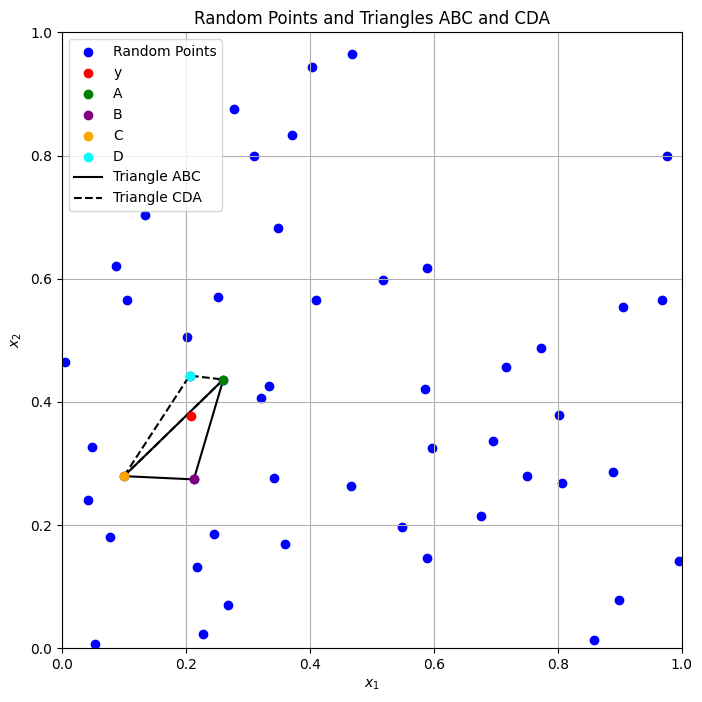

In [ ]:
# Plot the points and triangles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Random Points')
plt.scatter(y[0], y[1], c='red', label='y', zorder=5)
plt.scatter(A[0], A[1], c='green', label='A', zorder=5)
plt.scatter(B[0], B[1], c='purple', label='B', zorder=5)
plt.scatter(C[0], C[1], c='orange', label='C', zorder=5)
plt.scatter(D[0], D[1], c='cyan', label='D', zorder=5)

# Draw triangles ABC and CDA
if A is not None and B is not None and C is not None:
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'k-', label='Triangle ABC')
if C is not None and D is not None and A is not None:
    plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'k--', label='Triangle CDA')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.title('Random Points and Triangles ABC and CDA')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.show()


Given the provided expression in the exam set, we find $A$, $B$, $C$ and $D$. These are illustrated above with $X$, $y$ and the triangles $ABC$ and $CDA$.

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
def barycentric_coordinates(y, A, B, C):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    if denom == 0:
        return None, None, None  # Degenerate triangle
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Compute barycentric coordinates for y with respect to ABC
r1_ABC, r2_ABC, r3_ABC = barycentric_coordinates(y, A, B, C)
print("Barycentric coordinates w.r.t. ABC:", r1_ABC, r2_ABC, r3_ABC)

# Compute barycentric coordinates for y with respect to CDA
r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(y, C, D, A)
print("Barycentric coordinates w.r.t. CDA:", r1_CDA, r2_CDA, r3_CDA)

# Check which triangle y is inside
def is_inside_triangle(r1, r2, r3):
    return 0 <= r1 <= 1 and 0 <= r2 <= 1 and 0 <= r3 <= 1

inside_ABC = is_inside_triangle(r1_ABC, r2_ABC, r3_ABC)
inside_CDA = is_inside_triangle(r1_CDA, r2_CDA, r3_CDA)

if inside_ABC:
    print("Point y is inside triangle ABC.")
elif inside_CDA:
    print("Point y is inside triangle CDA.")
else:
    print("Point y is outside both triangles ABC and CDA.")


Barycentric coordinates w.r.t. ABC: 0.6286263152916166 0.06910145494351515 0.3022722297648682
Barycentric coordinates w.r.t. CDA: 0.3682598757102867 -0.13392661883334067 0.765666743123054
Point y is inside triangle ABC.


We calculate the baycentric coordinates w.r.t. the two triangles and see that point y is inside triangle ABC, which can also be seen from the visualization in question 1. 

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
# We compute the approximation of f(y) using the barycentric coordinates
f_approx = None
if inside_ABC:
    f_approx = r1_ABC * f(A) + r2_ABC * f(B) + r3_ABC * f(C)
    print("Point y is inside triangle ABC.")
elif inside_CDA:
    f_approx = r1_CDA * f(C) + r2_CDA * f(D) + r3_CDA * f(A)
    print("Point y is inside triangle CDA.")
else:
    print("Point y is outside both triangles ABC and CDA.")

# We compute the true value of f(y)
f_true = f(y)

print("Approximate value of f(y):", f_approx)
print("True value of f(y):", f_true)

Point y is inside triangle ABC.
Approximate value of f(y): 0.08405201731052576
True value of f(y): 0.0789565216259594


Using the algorithm, we find the aprroximate value of $f(y)$, which is relatively close to the true value as seen from the prints above. 

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [58]:
results = []
for y in Y:
    # Find points A, B, C, and D for each y
    A = find_point(X, y, cond_A)
    B = find_point(X, y, cond_B)
    C = find_point(X, y, cond_C)
    D = find_point(X, y, cond_D)
    
    if A is None or B is None or C is None or D is None:
        results.append((y, round(f(y), 3), "NaN"))
        continue
    
    # Compute barycentric coordinates
    r1_ABC, r2_ABC, r3_ABC = barycentric_coordinates(y, A, B, C)
    r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(y, C, D, A)
    
    # Determine which triangle y is inside
    inside_ABC = is_inside_triangle(r1_ABC, r2_ABC, r3_ABC)
    inside_CDA = is_inside_triangle(r1_CDA, r2_CDA, r3_CDA)
    
    # Approximate f(y) using barycentric interpolation
    f_approx = "NaN"
    if inside_ABC:
        f_approx = r1_ABC * f(A) + r2_ABC * f(B) + r3_ABC * f(C)
    elif inside_CDA:
        f_approx = r1_CDA * f(C) + r2_CDA * f(D) + r3_CDA * f(A)
    
    # Compute the true value of f(y)
    f_true = f(y)
    
    # Store the results
    results.append((y, f_true, f_approx))

# Print the results
for y, f_true, f_approx in results:
    print(f"Point y: {y}")
    print(f"True value of f(y): {f_true:.2f}")
    print(f"Approximate value of f(y): {f_approx}")
    print()

Point y: (0.2, 0.2)
True value of f(y): 0.04
Approximate value of f(y): 0.04032631372248057

Point y: (0.8, 0.2)
True value of f(y): 0.16
Approximate value of f(y): 0.15874233999349835

Point y: (0.8, 0.8)
True value of f(y): 0.64
Approximate value of f(y): NaN

Point y: (0.8, 0.2)
True value of f(y): 0.16
Approximate value of f(y): 0.15874233999349835

Point y: (0.5, 0.5)
True value of f(y): 0.25
Approximate value of f(y): 0.2512901561119622



We repeat question 3 given the coordinates in the set $Y$. (We are aware that 2 coordinates are the same, but choose to still run it for all). We see that all the approximations for $f(y)$ is close to the true values for all points in the set $Y$. 